## Get hashtags and topics of different troll classes

Analyze the hashtags, mentions, and topics of each of the seven "troll classes", as defined by Clemson University; Darren Linvill and Patrick Warren in their analysis of the Russian Troll Farm Twitter data.

***Background info on classes***

### Troll Classes  
* Right Troll - 
* Left Troll - 
* NonEnglish - 
* FearMonger - 
* HashTagGamer - 
* NewsFeed - 
* Commercial - 

In [33]:
# import standard libraries
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# encoding='utf-8',
#right_troll = pd.read_csv('../data/right_troll.csv', parse_dates = ['publish_date'], low_memory=False)
#nonenglish = pd.read_csv('../data/nonenglish.csv', parse_dates = ['publish_date'], low_memory=False)
#fearmonger = pd.read_csv('../data/fearmonger.csv', parse_dates = ['publish_date'], low_memory=False)
#left_troll = pd.read_csv('../data/left_troll.csv', parse_dates = ['publish_date'], low_memory=False)
#hashtagamer = pd.read_csv('../data/hashtagamer.csv', parse_dates = ['publish_date'], low_memory=False)
#newsfeed = pd.read_csv('../data/newsfeed.csv', parse_dates = ['publish_date'], low_memory=False)
#commercial = pd.read_csv('../data/commercial.csv', parse_dates = ['publish_date'], low_memory=False)
# print(df.shape)

In [35]:
# read each troll classification file as 'df'
df = pd.read_csv('../data/right_troll.csv', parse_dates = ['publish_date'], low_memory=False)
name = 'Right Troll'

## Stopwords

In [36]:
# Use a stopwords list and add my own custom stopwords

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# Use a stopwords list

stopword_list = stopwords.words('english')

"""
Add my own stopwords list
"""

stopword_list += ['http', 'https', 'âµã', 'â½ã', 'â²ã', 'âºã', 'â¼ã', 'âµ']
stopword_list += ['â³ã', 'â¾', 'â²', 'â¹', 'â¼', 'â¹ã', 'â½', 'âº', 'âªã']

print("StopWords List: \n", stopword_list)

StopWords List: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

### Remove Stopwords from each DF

In [37]:
type(df['cleaned'])

pandas.core.series.Series

In [38]:
# function to remove stopwords
def remove_stopwords(con):
    con_new = " ".join([i for i in con if i not in stop_words])
    return con_new

# remove short words (length < 3)
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>2]))
#df['cleaned'] = df['cleaned'].astype(str).str.split()
#df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
#                                    if x not in stop_words))

#df.cleaned[1]

# remove stopwords from the text
content = [remove_stopwords(r.split()) for r in df['cleaned']]

# make entire text lowercase
content = [r.lower() for r in content]

In [39]:
#right_troll_content = clean_stop(right_troll)
content[:10]

['sitting democrat senator trial corruption youve barely heard peep mainstream media nedryun',
 'marshawn lynch arrives game antitrump shirt judging sagging pants shirt say lynch belt',
 'daughter fallen navy sailor delivers powerful monologue anthem protests burns nfl packers gear #boycottnfl',
 'just president trump dedicates presidents cup golf tournament trophy people florida texas puerto rico',
 'respecting national anthem #standforouranthem',
 'dan bongino nobody trolls liberals better donald trump exactly',
 '',
 'senatormenendez carmenyulincruz doesnt matter cnn doesnt report crimes this wont change fact youre going',
 'much hate promoting cnn article admitting everything trump said relief two days ago',
 'after genocide remark san juan mayor narrative changed though cnn fixes reporting constantly']

## Word Frequency

In [42]:
from nltk import FreqDist

# function to plot most frequent terms
def freq_words(x, terms = 20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    return d

In [47]:
counts = freq_words(content, 20)
print(counts)

                 word  count
39              trump  86262
149               the  57527
132             obama  27973
148          breaking  27610
163           hillary  23703
69               this  23502
341               amp  22912
512             video  21747
943               new  21559
46             people  21206
37               just  19101
38          president  18943
634               you  18927
281              like  17530
207              dont  16715
427           america  16704
271   realdonaldtrump  16519
227               one  16343
2089              via  16143
371             #maga  15857


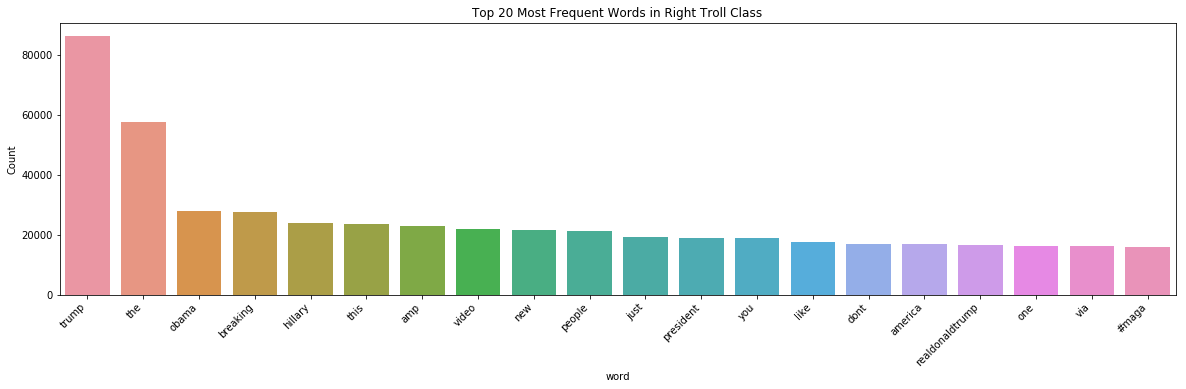

In [44]:
# Plot most frequent words
plt.figure(figsize=(20,5))
# rotate and right align group names
plt.xticks(rotation=45, ha='right')
ax = sns.barplot(data=counts, x= "word", y = "count")
ax.set(ylabel = 'Count')
ax.set(title = 'Top 20 Most Frequent Words in ' + name + ' Class')    
plt.show()

In [45]:
# strip hashtags from 'cleaned'
# remove all hashtags from a tweet
def remove_hashtags(tweet):
    '''Provide a tweet and remove hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

In [46]:
#create list of content with no hashtags
content_notags = list(map(remove_hashtags, content))

### Hashtag Analysis

In [ ]:
# create a list of all hashtags
all_hashtags = right_troll['hashtags'].tolist()

# all_hashtags is a list of lists.
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()
print(hashtag_counts[:25])

In [ ]:
#right_troll_counts = count_hashtags(right_troll)
#print(right_troll_counts[:25])
#right_troll['hashtags'][:25]

# use pre-trained model
https://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation

As usual, a trained model can used be to transform new, unseen documents (plain bag-of-words count vectors) into LDA topic distributions:

<code>doc_lda = lda[doc_bow]</code>

Also, look at using Googles pre-trained model.

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

